In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_29188\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m10_v10_l123=torch.tensor([[[  9.8981,  44.9888,  61.1681,  69.8529,  85.1715, 100.0000,  86.1833],
         [  6.0265,  42.8341,  45.9337,  46.8536,  84.2777, 100.0000,  92.6433],
         [ 18.8894,  51.3636,  56.8470,  70.0346,  80.5742,  99.9204,  95.9067],
         [  5.2877,  27.7778,  44.4078,  25.9259,  53.8825,  73.0964,  71.6200],
         [  5.6818,  16.6667,  44.0398,  66.6667,  82.8662,  99.8290,  98.9800],
         [ 15.0997,   0.0000,  38.9545,  33.3333,  81.6415,  99.8751,  99.4367],
         [ 38.8889,   0.0000,  41.9625,   0.0000,  69.9376,  99.8859,  99.6300],
         [  0.0000,   0.0000,  30.9524,   0.0000,  78.2738,  99.8864,  99.7867],
         [  0.0000,   0.0000,  11.1111,   0.0000,  64.0873,  99.8999,  99.8433],
         [  0.0000,   0.0000,  16.6667,   0.0000,  72.7778,  99.9533,  99.9333]],

        [[ 11.7125,  21.4872,  41.2354,  45.7014,  78.5437, 100.0000,  57.9067],
         [  7.9924,  29.0033,  41.6001,  52.5107,  75.3643,  98.9245,  71.2533],
         [ 11.1970,  23.7087,  47.2996,  43.8110,  71.7759,  97.6950,  81.1100],
         [ 10.7182,  26.4548,  41.1848,  45.8579,  71.1581,  98.8434,  88.6333],
         [  9.0486,  18.7692,  39.9811,  42.7848,  72.7014,  99.4033,  93.9367],
         [  5.8773,  15.3423,  33.8390,  41.3561,  70.6982,  99.5662,  96.6500],
         [  0.0000,  15.7407,  41.1224,  58.6490,  75.2842,  99.6407,  98.4867],
         [  0.0000,  20.0000,  49.8016,  72.3810,  77.7995,  99.8441,  99.3967],
         [  0.0000,   0.0000,  48.1481,  33.3333,  77.6269,  99.8657,  99.6833],
         [  0.0000,   0.0000,  47.2222,  33.3333,  70.8115,  99.8662,  99.7700]],

        [[  8.6310,  20.4520,  43.3062,  47.4496,  77.3425,  87.0918,  17.7633],
         [  8.5993,  19.2686,  36.4989,  34.2600,  59.3304,  85.2107,  27.4333],
         [  8.6790,  15.0197,  31.7914,  26.7149,  53.7422,  87.9431,  37.9700],
         [  9.5674,  13.6940,  30.6921,  22.3757,  50.5447,  87.5221,  52.5067],
         [ 12.0598,  17.2730,  31.4517,  31.0676,  60.0757,  94.3243,  72.3833],
         [ 13.1165,  25.6456,  42.2821,  48.5399,  71.8742,  98.0689,  88.6267],
         [ 49.4444,  43.8951,  59.9308,  66.9896,  85.6476,  99.5795,  96.9200],
         [ 33.3333,  49.8737,  66.3143,  77.6696,  90.4755,  99.8171,  99.1100],
         [  0.0000,  16.6667,  83.8421,  55.5556,  91.0682,  99.9050,  99.7333],
         [  0.0000,   0.0000,  86.1111,  33.3333,  94.9495,  99.9464,  99.9167]],

        [[  9.7996,  29.7972,  54.4459,  47.9076,  82.2599,  66.6667,  12.4933],
         [  9.1506,  19.9178,  37.4820,  32.5229,  62.3364,  97.4359,  13.5800],
         [  9.1409,  14.0101,  28.8849,  23.0270,  43.5336,  65.5387,  17.1300],
         [ 10.9827,  13.8695,  27.0832,  20.0152,  39.9993,  67.6069,  26.1633],
         [ 10.9361,  15.6980,  28.0373,  23.7450,  44.7520,  76.2382,  43.0167],
         [ 25.6217,  34.4172,  49.4259,  51.8797,  73.8311,  95.4247,  80.2767],
         [ 52.5974,  69.0657,  86.1924,  85.8916,  94.5055,  99.6594,  98.0300],
         [  0.0000,  91.6667,  90.6125,  95.2381,  97.0007,  99.8972,  99.6900],
         [  0.0000,  33.3333, 100.0000,  50.0000,  98.7561,  99.9292,  99.9133],
         [  0.0000,   0.0000,   0.0000,   0.0000,  95.8333,  99.9800,  99.9767]],

        [[ 10.0481,  26.4946,  57.0476,  60.1852,  33.3333,   0.0000,  10.7000],
         [  9.6344,  21.3951,  43.1081,  34.6049,  53.5714,   0.0000,  11.2367],
         [  9.5239,  15.9916,  29.2299,  22.5571,  39.6319,  60.4762,  12.2433],
         [ 10.0556,  14.4219,  25.7580,  21.5589,  38.8579,  57.5529,  16.3367],
         [ 10.9772,  14.1433,  22.6371,  17.1352,  29.6408,  47.0535,  22.3967],
         [ 26.7325,  38.5767,  52.3110,  52.0040,  67.0556,  86.8042,  68.9767],
         [ 80.2381,  91.8601,  96.3661,  96.5418,  98.8511,  99.7962,  99.4033],
         [  0.0000,  66.6667, 100.0000, 100.0000,  99.5860,  99.9793,  99.9667],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  99.9933,  99.9933],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]],

        [[  9.6296,  33.6086,  62.2222,  50.0000,   0.0000,   0.0000,   9.9067],
         [ 10.1427,  21.0023,  44.8366,  36.5079,  50.0000,   0.0000,  10.5833],
         [  9.8591,  18.2391,  39.7331,  29.7122,  44.4444,   0.0000,  11.0100],
         [  9.3849,  15.2969,  30.1572,  21.5897,  39.9554,  57.9365,  12.0300],
         [ 10.6259,  12.3383,  18.1547,  15.7997,  22.8908,  33.7010,  13.7467],
         [  8.4867,  11.7571,  16.9527,  14.7126,  18.9088,  22.7701,  17.3600],
         [  0.0000, 100.0000, 100.0000, 100.0000,  99.8624,  99.9684,  99.9533],
         [  0.0000,   0.0000,   0.0000,   0.0000,  66.6667,  99.9867,  99.9867],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9933,  99.9933],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]]])
m10_v10_L3_s2_trial10=torch.tensor([[[ 99.9964,  82.9252,  46.7936,  27.1989,   7.6422,  86.6930],
         [ 99.8977,  80.8734,  40.1149,  23.9434,  10.4839,  91.9780],
         [ 99.7021,  82.7097,  48.6056,  31.2175,   5.3692,  94.8430],
         [ 99.6657,  81.2540,  42.4386,  32.5000,  12.7680,  97.7560],
         [ 99.7958,  79.6990,  50.7574,  30.0000,   3.8743,  98.9030],
         [ 99.7954,  78.9142,  49.5871,   0.0000,  16.0528,  99.3610],
         [ 99.8130,  77.7009,  47.0859,   0.0000,  13.3333,  99.6450],
         [ 99.8095,  76.0624,  25.1364,  20.0000,   6.6667,  99.6980],
         [ 99.9179,  60.4591,  20.8333,   0.0000,   0.0000,  99.8610],
         [ 99.9520,  65.5000,   8.3333,   0.0000,   0.0000,  99.9320]],

        [[ 99.3001,  81.7295,  50.5472,  26.2331,  11.0687,  59.5490],
         [ 99.0219,  75.5164,  44.7631,  21.6210,  10.6521,  70.9400],
         [ 98.1896,  74.0842,  42.9474,  23.9063,  11.1533,  81.3500],
         [ 99.0227,  70.9733,  39.4740,  20.5013,  10.5528,  88.7310],
         [ 99.4244,  74.3014,  38.5962,  21.0408,   9.0832,  93.9220],
         [ 99.5742,  73.5136,  40.0579,  24.5137,  12.8195,  97.0090],
         [ 99.7308,  75.0536,  37.1812,  25.8539,   3.4286,  98.5740],
         [ 99.8273,  76.8890,  34.7061,  45.5000,  10.0000,  99.3420],
         [ 99.8821,  74.0907,  45.1575,  20.0000,   0.0000,  99.6540],
         [ 99.9288,  77.2720,  36.4365,   0.0000,   0.0000,  99.8550]],

        [[ 99.8507,  79.3524,  51.7281,  23.5886,   8.3879,  20.2860],
         [ 88.6185,  59.9638,  35.4120,  18.7535,  10.2578,  28.3330],
         [ 88.4868,  55.4993,  32.9792,  16.5958,   9.8153,  40.1240],
         [ 90.8203,  55.2912,  31.4622,  15.8397,  10.3434,  55.1380],
         [ 96.4978,  66.1652,  35.9698,  20.2209,  11.4708,  75.8820],
         [ 98.7069,  74.5268,  44.7667,  24.3177,  17.8721,  89.4570],
         [ 99.7366,  85.5719,  58.0247,  39.6642,  15.9552,  96.9330],
         [ 99.9136,  91.3483,  71.7243,  50.8651,  21.6667,  99.3020],
         [ 99.9532,  93.9986,  76.9122,  10.0000,   0.0000,  99.8210],
         [ 99.9970,  97.1356,  67.5000,   0.0000,   0.0000,  99.9820]],

        [[ 70.0000,  87.7854,  62.5963,  30.0118,   9.6892,  12.4920],
         [ 84.0615,  66.8471,  41.6850,  20.0500,   9.4458,  14.4020],
         [ 74.2214,  48.1607,  28.7235,  15.4282,   9.6621,  18.1750],
         [ 71.3008,  42.1747,  25.3768,  14.2340,   9.9401,  26.3890],
         [ 80.7312,  46.2729,  26.0681,  14.7802,  11.3947,  44.3970],
         [ 95.9445,  71.8668,  44.8919,  27.5790,  18.3022,  78.9350],
         [ 99.7938,  94.1340,  79.0204,  61.0092,  43.1017,  97.6920],
         [ 99.9797,  98.8046,  96.4791,  86.1587,   0.0000,  99.8780],
         [ 99.9990,  99.5793,  94.1667,  20.0000,   0.0000,  99.9930],
         [ 99.9990, 100.0000,   0.0000,   0.0000,   0.0000,  99.9990]],

        [[  0.0000,  80.0000,  59.5621,  31.5489,   9.9414,  10.7570],
         [ 40.0000,  71.8064,  42.8213,  20.7310,   9.6141,  11.2490],
         [ 77.9264,  48.2822,  29.2690,  16.4369,   9.4553,  12.6470],
         [ 60.8431,  37.6839,  24.1449,  13.7555,   9.5424,  16.0370],
         [ 52.0114,  31.4282,  19.9971,  12.0844,   9.8951,  22.6370],
         [ 81.7576,  54.8333,  33.6611,  22.3457,  15.7302,  58.1510],
         [ 99.8652,  97.9005,  92.2567,  81.2539,  77.4791,  99.0190],
         [ 99.9938,  99.7930,  99.1033,  35.0000,   0.0000,  99.9840],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000,  10.0000,  67.6786,  30.1121,   9.9675,  10.2270],
         [  0.0000,  40.0000,  49.4591,  22.8601,   9.9823,  10.5330],
         [  0.0000,  58.5357,  35.3289,  18.7296,   9.7686,  10.9910],
         [ 66.0000,  46.0554,  28.3676,  14.9999,   9.3105,  12.0160],
         [ 46.3376,  29.0893,  18.2429,  12.4110,   9.5796,  14.2920],
         [ 35.5065,  25.0191,  18.3432,  13.8775,  11.1175,  22.9690],
         [ 99.9004,  99.6754,  99.2290,  90.0000,  10.0000,  99.8610],
         [100.0000,  80.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]]])

m10_v10_L3_s2_trial10_test_size=torch.tensor([[[7.3591e+03, 1.0940e+03, 7.6510e+02, 5.4400e+01, 7.2740e+02],
         [8.1746e+03, 9.6340e+02, 5.4860e+02, 2.9700e+01, 2.8370e+02],
         [8.7308e+03, 7.0910e+02, 3.7010e+02, 1.4900e+01, 1.7510e+02],
         [9.4816e+03, 3.1360e+02, 1.4740e+02, 3.8000e+00, 5.3600e+01],
         [9.7462e+03, 1.6230e+02, 6.4000e+01, 1.3000e+00, 2.6200e+01],
         [9.8724e+03, 8.4800e+01, 3.0700e+01, 8.0000e-01, 1.1300e+01],
         [9.9491e+03, 3.5300e+01, 1.3400e+01, 1.0000e-01, 2.1000e+00],
         [9.9721e+03, 1.9100e+01, 6.5000e+00, 3.0000e-01, 2.0000e+00],
         [9.9888e+03, 8.2000e+00, 2.3000e+00, 0.0000e+00, 7.0000e-01],
         [9.9954e+03, 3.4000e+00, 1.2000e+00, 0.0000e+00, 0.0000e+00]],

        [[2.5259e+03, 2.1745e+03, 2.3679e+03, 9.5950e+02, 1.9722e+03],
         [4.3915e+03, 2.3127e+03, 1.7764e+03, 4.9590e+02, 1.0235e+03],
         [6.2069e+03, 1.9419e+03, 1.1554e+03, 2.2550e+02, 4.7030e+02],
         [7.6518e+03, 1.3963e+03, 6.6240e+02, 1.0560e+02, 1.8390e+02],
         [8.6313e+03, 8.8500e+02, 3.4940e+02, 5.1500e+01, 8.2800e+01],
         [9.3010e+03, 5.0300e+02, 1.5530e+02, 1.9500e+01, 2.1200e+01],
         [9.6598e+03, 2.6230e+02, 6.5800e+01, 7.9000e+00, 4.2000e+00],
         [9.8424e+03, 1.2790e+02, 2.6500e+01, 2.8000e+00, 4.0000e-01],
         [9.9277e+03, 5.9600e+01, 1.2200e+01, 5.0000e-01, 0.0000e+00],
         [9.9725e+03, 2.3300e+01, 4.2000e+00, 0.0000e+00, 0.0000e+00]],

        [[1.1020e+02, 4.1270e+02, 1.1677e+03, 1.9010e+03, 6.4084e+03],
         [5.1330e+02, 1.2398e+03, 2.3422e+03, 2.2633e+03, 3.6414e+03],
         [1.6966e+03, 2.1815e+03, 2.5509e+03, 1.6275e+03, 1.9435e+03],
         [3.4724e+03, 2.6626e+03, 2.0440e+03, 1.0069e+03, 8.1410e+02],
         [5.6722e+03, 2.3017e+03, 1.2860e+03, 5.0600e+02, 2.3410e+02],
         [7.4779e+03, 1.6337e+03, 6.5410e+02, 1.8180e+02, 5.2500e+01],
         [8.7369e+03, 9.4110e+02, 2.6670e+02, 4.6100e+01, 9.2000e+00],
         [9.4886e+03, 4.3130e+02, 7.1200e+01, 7.7000e+00, 1.2000e+00],
         [9.8277e+03, 1.5580e+02, 1.6300e+01, 2.0000e-01, 0.0000e+00],
         [9.9511e+03, 4.7100e+01, 1.8000e+00, 0.0000e+00, 0.0000e+00]],

        [[1.4000e+00, 1.8300e+01, 1.9930e+02, 7.9300e+02, 8.9880e+03],
         [2.0600e+01, 1.3200e+02, 6.5550e+02, 1.7932e+03, 7.3987e+03],
         [1.7060e+02, 6.5920e+02, 1.7431e+03, 2.6972e+03, 4.7299e+03],
         [9.3860e+02, 1.7583e+03, 2.5768e+03, 2.4331e+03, 2.2932e+03],
         [2.8334e+03, 2.7094e+03, 2.3365e+03, 1.3950e+03, 7.2570e+02],
         [5.5784e+03, 2.5044e+03, 1.3054e+03, 4.7850e+02, 1.3330e+02],
         [8.0059e+03, 1.4759e+03, 4.2520e+02, 8.0400e+01, 1.2600e+01],
         [9.3726e+03, 5.4840e+02, 7.3600e+01, 5.2000e+00, 2.0000e-01],
         [9.8977e+03, 9.7800e+01, 4.3000e+00, 2.0000e-01, 0.0000e+00],
         [9.9954e+03, 4.6000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 2.2000e+00, 3.4700e+01, 2.8920e+02, 9.6739e+03],
         [8.0000e-01, 1.4000e+01, 1.4800e+02, 9.3200e+02, 8.9052e+03],
         [1.0200e+01, 1.1150e+02, 6.2260e+02, 2.0852e+03, 7.1705e+03],
         [1.4690e+02, 6.4330e+02, 1.7868e+03, 3.1281e+03, 4.2949e+03],
         [1.1200e+03, 2.1732e+03, 2.7910e+03, 2.4323e+03, 1.4835e+03],
         [4.0203e+03, 3.0427e+03, 1.9190e+03, 8.0800e+02, 2.1000e+02],
         [7.7105e+03, 1.7510e+03, 4.5700e+02, 7.4500e+01, 7.0000e+00],
         [9.6487e+03, 3.2990e+02, 2.0800e+01, 6.0000e-01, 0.0000e+00],
         [9.9924e+03, 7.6000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 1.0000e-01, 6.4000e+00, 1.0940e+02, 9.8841e+03],
         [0.0000e+00, 8.0000e-01, 2.5800e+01, 3.4510e+02, 9.6283e+03],
         [0.0000e+00, 5.4000e+00, 1.1530e+02, 1.0075e+03, 8.8718e+03],
         [3.4000e+00, 6.2100e+01, 5.3460e+02, 2.5229e+03, 6.8770e+03],
         [8.2500e+01, 6.7470e+02, 2.2871e+03, 3.9173e+03, 3.0384e+03],
         [1.7375e+03, 3.5939e+03, 3.1254e+03, 1.3080e+03, 2.3520e+02],
         [8.4279e+03, 1.4579e+03, 1.0980e+02, 4.3000e+00, 1.0000e-01],
         [9.9983e+03, 1.7000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])

m10_v10_L3_s2_trial5_alpha10_6=torch.tensor([[[100.0000,  92.8161,  50.1190,   0.0000,  11.4286,  95.9060],
         [100.0000,  91.9231,  50.8761,   0.0000,  18.4848,  99.8680],
         [100.0000,  88.1556,  68.3916,   0.0000,  14.6667,  99.9040],
         [ 99.9980,  83.8009,  50.9206,   0.0000,  15.0000,  99.8720],
         [ 99.9819,  88.5779,  48.0476,   0.0000,   0.0000,  99.8860],
         [ 99.9719,  96.0000,  37.9524,   0.0000,   5.0000,  99.9020],
         [ 99.9159,  98.0000,  36.6667,   0.0000,   0.0000,  99.8840],
         [ 99.8900,  55.0000,  20.0000,   0.0000,   0.0000,  99.8880]],

        [[100.0000,  89.5729,  52.7553,  23.3333,   7.7893,  92.3260],
         [100.0000,  86.1023,  50.9145,  35.0000,   9.1835,  98.1800],
         [ 99.8952,  85.5074,  46.1893,  26.6667,   8.8125,  98.1740],
         [ 99.7570,  91.7517,  42.3578,  10.0000,   6.9061,  98.8100],
         [ 99.5681,  89.0900,  31.0917,   0.0000,   9.1919,  99.2040],
         [ 99.6668,  82.0417,  42.3368,   0.0000,   3.3333,  99.5260],
         [ 99.6894,  82.4762,  43.4444,   0.0000,   0.0000,  99.6280],
         [ 99.8478,  85.6429,  30.0000,   0.0000,   0.0000,  99.8040]]])
m10_v10_L3_s2_trial5_alpha10_6_test_size=torch.tensor([[[9.5672e+03, 1.8600e+01, 1.1400e+01, 2.0000e-01, 4.0260e+02],
         [9.9622e+03, 2.1000e+01, 8.8000e+00, 0.0000e+00, 8.0000e+00],
         [9.9666e+03, 1.8800e+01, 9.8000e+00, 0.0000e+00, 4.8000e+00],
         [9.9646e+03, 1.9000e+01, 1.1400e+01, 0.0000e+00, 5.0000e+00],
         [9.9704e+03, 1.7800e+01, 9.0000e+00, 0.0000e+00, 2.8000e+00],
         [9.9756e+03, 1.4600e+01, 7.6000e+00, 0.0000e+00, 2.2000e+00],
         [9.9908e+03, 5.2000e+00, 2.8000e+00, 0.0000e+00, 1.2000e+00],
         [9.9984e+03, 1.4000e+00, 2.0000e-01, 0.0000e+00, 0.0000e+00]],

        [[8.8780e+03, 2.9180e+02, 1.5120e+02, 1.4000e+00, 6.7760e+02],
         [9.4746e+03, 2.9680e+02, 1.5920e+02, 2.2000e+00, 6.7200e+01],
         [9.5456e+03, 2.5200e+02, 1.3020e+02, 1.8000e+00, 7.0400e+01],
         [9.7092e+03, 1.7440e+02, 7.6800e+01, 6.0000e-01, 3.9000e+01],
         [9.9066e+03, 5.2800e+01, 2.7000e+01, 2.0000e-01, 1.3400e+01],
         [9.9650e+03, 1.9800e+01, 1.0400e+01, 0.0000e+00, 4.8000e+00],
         [9.9822e+03, 1.0400e+01, 4.8000e+00, 0.0000e+00, 2.6000e+00],
         [9.9896e+03, 6.0000e+00, 3.2000e+00, 0.0000e+00, 1.2000e+00]]])

ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)

hidden_1_error=torch.tensor([[[86.4422, 83.0769, 47.8063, 24.5284,  6.3118, 74.9200],
         [89.5666, 83.2747, 50.9793, 31.4491, 11.9001, 84.8140],
         [98.0453, 91.5158, 52.1761, 34.8456, 11.2057, 94.1500],
         [97.8569, 80.8020, 55.6442, 24.0000,  8.0215, 96.2240],
         [99.3455, 80.0372, 40.1701,  0.0000,  9.4429, 98.4440],
         [99.4571, 74.5301, 33.2292,  0.0000,  3.0769, 98.9260],
         [99.5956, 67.6253, 43.4510,  0.0000,  4.0000, 99.3440],
         [99.6570, 68.0573, 36.8889,  0.0000, 10.0000, 99.5340],
         [99.6956, 63.4748, 26.6667,  0.0000,  0.0000, 99.6400],
         [99.6158, 55.7143, 10.0000,  0.0000,  0.0000, 99.5920]],

        [[88.8523, 71.1753, 40.0666, 13.9112,  5.6209, 47.4920],
         [74.8057, 60.5484, 43.2384, 21.4105, 11.1089, 56.2700],
         [90.2493, 69.3025, 43.7404, 16.3548, 11.0382, 75.5520],
         [92.6121, 63.0134, 34.3197, 17.9725, 11.8372, 82.2680],
         [94.8761, 59.8848, 29.7768, 16.9523, 12.3122, 88.4660],
         [96.0312, 52.5068, 23.6171, 14.4698, 10.2974, 92.2680],
         [96.8237, 46.0767, 22.7172, 11.0769,  0.0000, 94.8480],
         [97.3520, 43.0305, 17.7059,  0.0000, 20.0000, 96.4100],
         [97.4297, 41.0157, 17.5079,  0.0000,  0.0000, 96.9920],
         [97.4067, 26.2436, 26.6667,  0.0000,  0.0000, 97.2060]],

        [[83.8544, 70.2794, 47.0893, 25.7983,  7.0733, 17.3880],
         [49.0467, 34.9564, 24.9857, 14.1621,  7.1709, 17.9020],
         [56.3233, 41.3693, 26.0957, 13.5913,  8.4900, 29.3920],
         [69.5456, 43.2231, 23.5946, 13.0096,  9.0990, 42.9780],
         [71.0083, 33.9016, 17.9820, 10.6741,  8.9130, 51.0380],
         [75.7705, 32.8649, 17.0577, 11.0683,  8.3375, 63.1980],
         [79.3147, 26.3247, 13.7678, 10.7890, 10.4221, 72.3560],
         [80.5533, 20.3570, 12.7384, 10.8571,  0.0000, 77.4200],
         [81.5218, 18.1811,  9.8030, 20.0000,  0.0000, 80.4180],
         [81.4084, 14.6253, 30.0000,  0.0000,  0.0000, 81.0960]],

        [[70.0000, 72.7057, 51.0344, 27.4879,  8.9476, 11.3240],
         [43.9848, 33.5582, 23.2334, 15.6041,  8.9106, 11.6120],
         [45.1213, 29.2981, 20.6055, 13.0614,  8.8001, 13.9720],
         [47.2804, 29.7001, 20.0586, 12.5324,  9.8802, 20.2300],
         [43.7158, 25.1582, 15.3100, 11.7463,  9.6664, 25.2320],
         [46.7144, 22.0742, 14.4433, 11.8641, 10.8841, 34.0840],
         [50.2507, 19.3847, 14.3059, 13.8223,  7.2991, 43.6840],
         [54.1470, 16.8693, 10.5565, 18.5714,  0.0000, 51.8980],
         [56.9971, 15.4000, 19.0000,  0.0000,  0.0000, 56.5480],
         [57.6236, 10.0000,  0.0000,  0.0000,  0.0000, 57.6000]],

        [[20.0000, 40.0000, 43.6471, 25.7438,  9.7362, 10.2860],
         [10.0000, 25.0196, 20.0574, 15.9170,  9.4003, 10.2120],
         [47.6288, 19.6730, 18.4243, 14.0601,  9.5331, 11.1420],
         [33.4334, 22.5149, 16.9424, 11.6589,  9.5146, 12.7400],
         [26.1400, 19.0086, 14.4583, 11.3022,  9.5262, 15.2140],
         [27.8424, 17.0650, 13.3673, 11.2719, 10.0956, 20.1240],
         [30.0483, 15.3574, 12.6793, 12.1398,  1.8182, 26.5240],
         [33.9287, 14.0614,  9.9582,  0.0000,  0.0000, 33.2440],
         [39.4099, 17.1667,  0.0000,  0.0000,  0.0000, 39.3880],
         [40.8860,  0.0000,  0.0000,  0.0000,  0.0000, 40.8860]],

        [[ 0.0000, 20.0000, 57.4084, 29.6663, 10.0302, 10.2820],
         [ 0.0000, 40.0000, 26.0322, 17.9296,  9.9297, 10.2540],
         [ 0.0000, 52.0952, 19.3696, 14.4669,  9.8916, 10.4740],
         [33.0000, 24.8320, 18.0503, 12.5802,  9.2307, 10.6580],
         [23.1297, 16.7969, 13.2100, 10.9210,  9.5789, 11.5320],
         [16.7899, 14.0579, 12.1701,  9.8926,  8.3666, 13.2580],
         [16.6690, 13.8876, 11.0889,  7.3333,  0.0000, 16.1940],
         [19.7754,  5.0000,  0.0000,  0.0000,  0.0000, 19.7720],
         [24.0500,  0.0000,  0.0000,  0.0000,  0.0000, 24.0500],
         [25.7900,  0.0000,  0.0000,  0.0000,  0.0000, 25.7900]]])
hidden_1_size=torch.tensor([[[7.1226e+03, 1.1454e+03, 7.6920e+02, 5.3000e+01, 9.0980e+02],
         [8.2210e+03, 9.9320e+02, 4.8140e+02, 3.0600e+01, 2.7380e+02],
         [8.7084e+03, 7.2640e+02, 3.5780e+02, 1.5200e+01, 1.9220e+02],
         [9.5102e+03, 2.9140e+02, 1.3260e+02, 3.4000e+00, 6.2400e+01],
         [9.7466e+03, 1.6660e+02, 6.5400e+01, 2.2000e+00, 1.9200e+01],
         [9.8732e+03, 8.2000e+01, 3.4000e+01, 6.0000e-01, 1.0200e+01],
         [9.9406e+03, 3.9000e+01, 1.7000e+01, 2.0000e-01, 3.2000e+00],
         [9.9702e+03, 2.2600e+01, 5.6000e+00, 0.0000e+00, 1.6000e+00],
         [9.9874e+03, 1.0000e+01, 1.8000e+00, 2.0000e-01, 6.0000e-01],
         [9.9956e+03, 3.4000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[2.5886e+03, 1.8384e+03, 2.2548e+03, 1.1768e+03, 2.1414e+03],
         [4.3892e+03, 2.2074e+03, 1.8196e+03, 4.5360e+02, 1.1302e+03],
         [6.2242e+03, 1.9106e+03, 1.2126e+03, 2.4220e+02, 4.1040e+02],
         [7.6674e+03, 1.3558e+03, 6.6320e+02, 1.1400e+02, 1.9960e+02],
         [8.6446e+03, 8.7360e+02, 3.5440e+02, 5.2000e+01, 7.5400e+01],
         [9.2816e+03, 5.1160e+02, 1.6740e+02, 2.0600e+01, 1.8800e+01],
         [9.6500e+03, 2.7180e+02, 6.7400e+01, 8.4000e+00, 2.4000e+00],
         [9.8416e+03, 1.2820e+02, 2.6800e+01, 3.0000e+00, 4.0000e-01],
         [9.9284e+03, 5.9800e+01, 1.1000e+01, 8.0000e-01, 0.0000e+00],
         [9.9716e+03, 2.6200e+01, 2.2000e+00, 0.0000e+00, 0.0000e+00]],

        [[7.9600e+01, 3.5760e+02, 1.0796e+03, 1.7618e+03, 6.7214e+03],
         [4.9740e+02, 1.1536e+03, 2.2474e+03, 2.1936e+03, 3.9080e+03],
         [1.7470e+03, 2.2386e+03, 2.4876e+03, 1.6000e+03, 1.9268e+03],
         [3.5812e+03, 2.6106e+03, 2.0270e+03, 1.0116e+03, 7.6960e+02],
         [5.6462e+03, 2.3232e+03, 1.2962e+03, 4.8860e+02, 2.4580e+02],
         [7.4436e+03, 1.6414e+03, 6.7400e+02, 1.8200e+02, 5.9000e+01],
         [8.7648e+03, 9.1420e+02, 2.6580e+02, 4.5400e+01, 9.8000e+00],
         [9.4900e+03, 4.2940e+02, 7.5000e+01, 4.4000e+00, 1.2000e+00],
         [9.8276e+03, 1.5620e+02, 1.5400e+01, 8.0000e-01, 0.0000e+00],
         [9.9530e+03, 4.5400e+01, 1.6000e+00, 0.0000e+00, 0.0000e+00]],

        [[2.8000e+00, 1.8400e+01, 1.8260e+02, 7.5780e+02, 9.0384e+03],
         [1.7200e+01, 1.4100e+02, 7.3860e+02, 1.8548e+03, 7.2484e+03],
         [1.7240e+02, 6.6580e+02, 1.7384e+03, 2.6908e+03, 4.7326e+03],
         [9.5400e+02, 1.7604e+03, 2.6276e+03, 2.3564e+03, 2.3016e+03],
         [2.8648e+03, 2.7318e+03, 2.2880e+03, 1.3878e+03, 7.2760e+02],
         [5.5438e+03, 2.5308e+03, 1.2964e+03, 4.8760e+02, 1.4140e+02],
         [7.9618e+03, 1.5056e+03, 4.4040e+02, 8.1800e+01, 1.0400e+01],
         [9.4078e+03, 5.2440e+02, 6.3400e+01, 4.2000e+00, 2.0000e-01],
         [9.8918e+03, 1.0340e+02, 4.8000e+00, 0.0000e+00, 0.0000e+00],
         [9.9952e+03, 4.6000e+00, 2.0000e-01, 0.0000e+00, 0.0000e+00]],

        [[2.0000e-01, 8.0000e-01, 3.4800e+01, 2.7620e+02, 9.6880e+03],
         [1.0000e+00, 1.3400e+01, 1.6340e+02, 9.4360e+02, 8.8786e+03],
         [9.8000e+00, 9.4200e+01, 5.7300e+02, 2.1414e+03, 7.1816e+03],
         [1.6440e+02, 6.5460e+02, 1.7772e+03, 3.1352e+03, 4.2686e+03],
         [1.0874e+03, 2.1600e+03, 2.8202e+03, 2.4626e+03, 1.4698e+03],
         [4.0592e+03, 3.0214e+03, 1.9200e+03, 8.0120e+02, 1.9820e+02],
         [7.7028e+03, 1.7610e+03, 4.5940e+02, 7.0800e+01, 6.0000e+00],
         [9.6586e+03, 3.2500e+02, 1.5800e+01, 6.0000e-01, 0.0000e+00],
         [9.9898e+03, 1.0200e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 2.0000e-01, 7.6000e+00, 1.1160e+02, 9.8806e+03],
         [0.0000e+00, 8.0000e-01, 2.6000e+01, 3.4560e+02, 9.6276e+03],
         [4.0000e-01, 6.0000e+00, 1.1440e+02, 9.9680e+02, 8.8824e+03],
         [3.2000e+00, 5.9600e+01, 5.4640e+02, 2.5258e+03, 6.8650e+03],
         [7.9000e+01, 6.8360e+02, 2.2914e+03, 3.9104e+03, 3.0356e+03],
         [1.7430e+03, 3.5760e+03, 3.1290e+03, 1.3164e+03, 2.3560e+02],
         [8.3984e+03, 1.4824e+03, 1.1600e+02, 3.2000e+00, 0.0000e+00],
         [9.9972e+03, 2.8000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])
perceptron_error=torch.tensor([[[100.0000,  91.5430,  81.7222,   0.0000,  13.3333,  99.9360],
         [100.0000,  96.8889,  69.1818,   0.0000,   4.0000,  99.9080],
         [100.0000, 100.0000,  60.2438,   0.0000,   0.0000,  99.9000],
         [ 99.9940,  91.1070,  67.2439,   0.0000,  20.7143,  99.9220],
         [ 99.9860,  98.8235,  52.8182,   0.0000,  12.3810,  99.8920],
         [ 99.9659,  93.6140,  53.2381,   0.0000,  22.5000,  99.8880],
         [ 99.9399,  75.6190,  70.0000,   0.0000,   0.0000,  99.9020],
         [ 99.9180,  50.0000,  13.3333,   0.0000,   0.0000,  99.9100]],

        [[100.0000,  94.4634,  72.6337,  48.0000,   5.4887,  90.8900],
         [ 99.9261,  97.2845,  60.6768,  41.6667,  18.7217,  98.5940],
         [ 99.7882,  98.4063,  57.6140,  23.3333,  15.8596,  98.6320],
         [ 99.7223,  96.6953,  44.4701,   0.0000,  15.6694,  98.9920],
         [ 99.6712,  88.0225,  50.1103,   0.0000,   0.0000,  99.4320],
         [ 99.6790,  84.6838,  41.6364,   0.0000,   0.0000,  99.5520],
         [ 99.7775,  85.4856,  36.1667,   0.0000,  15.0000,  99.7060],
         [ 99.8679,  80.7619,  18.0000,   0.0000,   0.0000,  99.8400]],

        [[100.0000,  86.3226,  54.9654,  28.9103,   6.3343,  89.1980],
         [ 99.7773,  94.3372,  55.4711,  30.1235,   9.8261,  94.1500],
         [ 98.9177,  87.3172,  48.6360,  17.5385,   8.9443,  94.6740],
         [ 98.7291,  85.0131,  49.2297,  20.0000,  15.6011,  97.2440],
         [ 99.2025,  81.4663,  41.2462,   0.0000,   9.4246,  98.3620],
         [ 99.3615,  73.8423,  39.0563,  20.0000,   9.4545,  98.8740],
         [ 99.4328,  70.1100,  29.5833,   0.0000,   6.6667,  99.2000],
         [ 99.3945,  64.2859,  46.7778,   0.0000,   0.0000,  99.2920]],

        [[ 99.3828,  91.4404,  53.6879,  20.7492,   7.1826,  61.1940],
         [ 98.7742,  85.7022,  46.8884,  22.2328,   7.4579,  73.8240],
         [ 95.1694,  75.0603,  39.9483,  17.9840,  10.1633,  78.5460],
         [ 94.7770,  71.0106,  32.2896,  17.5841,   8.3348,  84.5980],
         [ 94.0047,  60.5810,  29.7182,  12.9924,  11.1741,  87.8300],
         [ 94.3533,  51.4705,  21.4015,  10.8888,   7.9177,  90.4940],
         [ 93.5395,  42.6703,  21.6949,  18.6905,  24.0000,  91.6200],
         [ 92.8732,  33.9491,  21.4715,   6.6667,   0.0000,  91.8480]],

        [[ 98.9305,  90.9404,  68.7629,  30.9464,   7.5390,  22.9800],
         [ 89.8343,  74.5987,  44.0205,  19.7313,   8.2612,  31.3400],
         [ 82.5272,  58.0553,  33.6230,  16.2421,   9.0119,  39.0620],
         [ 81.2076,  51.4211,  27.0569,  13.0251,  10.4044,  49.6400],
         [ 76.7963,  39.0452,  21.7710,  12.4277,  11.1647,  56.2080],
         [ 73.6258,  30.7194,  17.1293,  12.3665,   7.4427,  61.5380],
         [ 69.3683,  23.8137,  15.4259,  14.0017,  12.2527,  63.3660],
         [ 66.9448,  17.1606,  16.0000,  11.1905,  20.0000,  64.4780]],

        [[ 60.0000,  95.3804,  86.3428,  43.4720,   8.9714,  13.3020],
         [ 95.7143,  80.1428,  52.2389,  24.5269,   8.8746,  15.3000],
         [ 76.8012,  55.7516,  33.4781,  18.0418,   9.6504,  20.3720],
         [ 66.5306,  41.8706,  23.7386,  13.5976,   8.9469,  25.3740],
         [ 58.8666,  30.3694,  17.4687,  11.7585,   9.1275,  31.4740],
         [ 50.8748,  21.8743,  13.3453,  10.0693,   8.9800,  36.2300],
         [ 45.9665,  16.0897,  12.1803,  14.1975,   5.4622,  39.7500],
         [ 42.0231,  12.7527,   9.7901,   6.6667,   0.0000,  40.1920]],

        [[  0.0000, 100.0000,  92.2897,  47.8602,  10.2643,  11.6700],
         [ 80.0000, 100.0000,  72.0254,  31.9642,   9.8280,  12.9600],
         [ 73.5317,  55.4777,  35.0234,  19.1838,   9.5777,  13.7560],
         [ 60.8450,  40.2946,  25.3843,  15.5513,   9.1802,  16.9200],
         [ 44.3590,  28.0601,  18.0866,  12.7936,   9.7090,  20.5540],
         [ 38.1135,  20.5903,  14.0904,  11.1878,   9.7791,  25.3980],
         [ 32.4549,  16.1500,  13.4648,  11.2651,   3.3333,  28.5880],
         [ 30.1898,  12.3790,  11.5084,  10.0000,   0.0000,  29.5720]],

        [[  0.0000,   0.0000,  95.0000,  60.5463,   9.9638,  10.5820],
         [  0.0000,  40.0000,  86.1843,  40.6861,  10.2655,  11.5120],
         [  0.0000,  76.1508,  48.3614,  23.9804,   9.5606,  11.4740],
         [ 78.4286,  46.1600,  28.8654,  16.7175,   9.4239,  12.5260],
         [ 32.3051,  26.4641,  18.7235,  12.9252,   9.4634,  14.2560],
         [ 22.5642,  17.6851,  14.2417,  11.5415,   8.1363,  16.4240],
         [ 19.3022,  15.9760,  12.7668,  12.8571,   0.0000,  18.7380],
         [ 19.2840,   0.0000,   0.0000,   0.0000,   0.0000,  19.2820]]])
perceptron_size=torch.tensor([[[9.9686e+03, 1.8600e+01, 8.6000e+00, 0.0000e+00, 4.2000e+00],
         [9.9696e+03, 1.6000e+01, 8.6000e+00, 0.0000e+00, 5.8000e+00],
         [9.9652e+03, 1.8600e+01, 1.0600e+01, 0.0000e+00, 5.6000e+00],
         [9.9656e+03, 2.3200e+01, 8.0000e+00, 0.0000e+00, 3.2000e+00],
         [9.9718e+03, 1.4600e+01, 8.4000e+00, 0.0000e+00, 5.2000e+00],
         [9.9754e+03, 1.4800e+01, 5.2000e+00, 0.0000e+00, 4.6000e+00],
         [9.9904e+03, 5.6000e+00, 2.4000e+00, 0.0000e+00, 1.6000e+00],
         [9.9982e+03, 8.0000e-01, 1.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[8.6914e+03, 2.8820e+02, 1.5200e+02, 3.4000e+00, 8.6500e+02],
         [9.4726e+03, 2.9220e+02, 1.5440e+02, 2.4000e+00, 7.8400e+01],
         [9.5274e+03, 2.7380e+02, 1.3540e+02, 1.6000e+00, 6.1800e+01],
         [9.7136e+03, 1.7800e+02, 7.9400e+01, 6.0000e-01, 2.8400e+01],
         [9.9146e+03, 5.2400e+01, 2.6200e+01, 0.0000e+00, 6.8000e+00],
         [9.9672e+03, 2.0000e+01, 8.8000e+00, 2.0000e-01, 3.8000e+00],
         [9.9796e+03, 1.2200e+01, 6.6000e+00, 0.0000e+00, 1.6000e+00],
         [9.9920e+03, 5.4000e+00, 2.2000e+00, 0.0000e+00, 4.0000e-01]],

        [[7.2616e+03, 1.3576e+03, 7.7300e+02, 6.7000e+01, 5.4080e+02],
         [8.1520e+03, 9.8280e+02, 5.7440e+02, 3.2200e+01, 2.5860e+02],
         [8.7722e+03, 6.7960e+02, 3.7460e+02, 1.5800e+01, 1.5780e+02],
         [9.5306e+03, 2.7760e+02, 1.3100e+02, 3.0000e+00, 5.7800e+01],
         [9.7532e+03, 1.6440e+02, 6.0600e+01, 4.0000e-01, 2.1400e+01],
         [9.8676e+03, 9.4400e+01, 3.0200e+01, 6.0000e-01, 7.2000e+00],
         [9.9448e+03, 3.9400e+01, 1.3000e+01, 2.0000e-01, 2.6000e+00],
         [9.9748e+03, 1.9400e+01, 5.0000e+00, 0.0000e+00, 8.0000e-01]],

        [[2.5996e+03, 2.2518e+03, 2.1650e+03, 8.4280e+02, 2.1408e+03],
         [4.4306e+03, 2.3020e+03, 1.8138e+03, 4.4680e+02, 1.0068e+03],
         [6.1010e+03, 1.9428e+03, 1.2342e+03, 2.4620e+02, 4.7580e+02],
         [7.6270e+03, 1.3782e+03, 6.6560e+02, 1.0920e+02, 2.2000e+02],
         [8.6680e+03, 8.4900e+02, 3.5620e+02, 4.9200e+01, 7.7600e+01],
         [9.2602e+03, 5.2720e+02, 1.6980e+02, 2.3000e+01, 1.9800e+01],
         [9.6572e+03, 2.6240e+02, 7.1200e+01, 6.0000e+00, 3.2000e+00],
         [9.8334e+03, 1.3620e+02, 2.7200e+01, 2.6000e+00, 6.0000e-01]],

        [[1.2460e+02, 4.1580e+02, 1.1744e+03, 1.6920e+03, 6.5932e+03],
         [5.4840e+02, 1.2280e+03, 2.2178e+03, 2.1962e+03, 3.8096e+03],
         [1.6534e+03, 2.0918e+03, 2.5944e+03, 1.7060e+03, 1.9544e+03],
         [3.5178e+03, 2.5884e+03, 2.0446e+03, 1.0320e+03, 8.1720e+02],
         [5.6496e+03, 2.3558e+03, 1.2480e+03, 4.9720e+02, 2.4940e+02],
         [7.4924e+03, 1.6286e+03, 6.4780e+02, 1.8080e+02, 5.0400e+01],
         [8.7434e+03, 9.4000e+02, 2.6220e+02, 4.5400e+01, 9.0000e+00],
         [9.5072e+03, 4.1040e+02, 7.4800e+01, 7.2000e+00, 4.0000e-01]],

        [[1.2000e+00, 2.3200e+01, 1.8120e+02, 7.8820e+02, 9.0062e+03],
         [2.0600e+01, 1.2080e+02, 6.1300e+02, 1.7520e+03, 7.4936e+03],
         [1.6800e+02, 6.7980e+02, 1.7658e+03, 2.7052e+03, 4.6812e+03],
         [9.3440e+02, 1.8728e+03, 2.5462e+03, 2.3898e+03, 2.2568e+03],
         [2.8838e+03, 2.7070e+03, 2.2652e+03, 1.4022e+03, 7.4180e+02],
         [5.5810e+03, 2.5178e+03, 1.3030e+03, 4.6760e+02, 1.3060e+02],
         [7.9884e+03, 1.4632e+03, 4.4760e+02, 8.5200e+01, 1.5600e+01],
         [9.3834e+03, 5.4020e+02, 7.0400e+01, 5.6000e+00, 4.0000e-01]],

        [[0.0000e+00, 1.0000e+00, 3.2600e+01, 2.9780e+02, 9.6686e+03],
         [1.6000e+00, 1.3200e+01, 1.5840e+02, 9.0880e+02, 8.9180e+03],
         [1.3000e+01, 1.0600e+02, 6.2000e+02, 2.1012e+03, 7.1598e+03],
         [1.4620e+02, 6.6300e+02, 1.8172e+03, 3.1026e+03, 4.2710e+03],
         [1.1066e+03, 2.1568e+03, 2.7446e+03, 2.4892e+03, 1.5028e+03],
         [4.0206e+03, 3.0412e+03, 1.9144e+03, 8.1720e+02, 2.0660e+02],
         [7.7306e+03, 1.7470e+03, 4.4600e+02, 6.9800e+01, 6.6000e+00],
         [9.6540e+03, 3.2620e+02, 1.9000e+01, 8.0000e-01, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 5.8000e+00, 1.1260e+02, 9.8816e+03],
         [0.0000e+00, 4.0000e-01, 2.5600e+01, 3.4560e+02, 9.6284e+03],
         [0.0000e+00, 6.6000e+00, 1.1220e+02, 9.9580e+02, 8.8854e+03],
         [4.6000e+00, 5.6200e+01, 5.4240e+02, 2.4882e+03, 6.9086e+03],
         [8.5200e+01, 6.7140e+02, 2.2856e+03, 3.8862e+03, 3.0716e+03],
         [1.7208e+03, 3.6230e+03, 3.1128e+03, 1.3092e+03, 2.3420e+02],
         [8.4102e+03, 1.4656e+03, 1.2020e+02, 3.8000e+00, 2.0000e-01],
         [9.9990e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])

C:\Users\alexk\AppData\Local\Temp\ipykernel_29188\2777278912.py:9: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(m10_v10_L3_s2_trial10_test_size[j, :, i].numpy())
C:\Users\alexk\AppData\Local\Temp\ipykernel_29188\2777278912.py:18: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(perceptron_size[j, :, i].numpy())
C:\Users\alexk\AppData\Local\Temp\ipykernel_29188\2777278912.py:69: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(m10_v10_L3_s2_trial5_alpha10_6_test_size[j, :, i].numpy())
C:\Users\alexk\AppData\Local\Temp\ipykernel_29188\2777278912.py:78: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(perceptron_size[j+2, :, i].numpy())


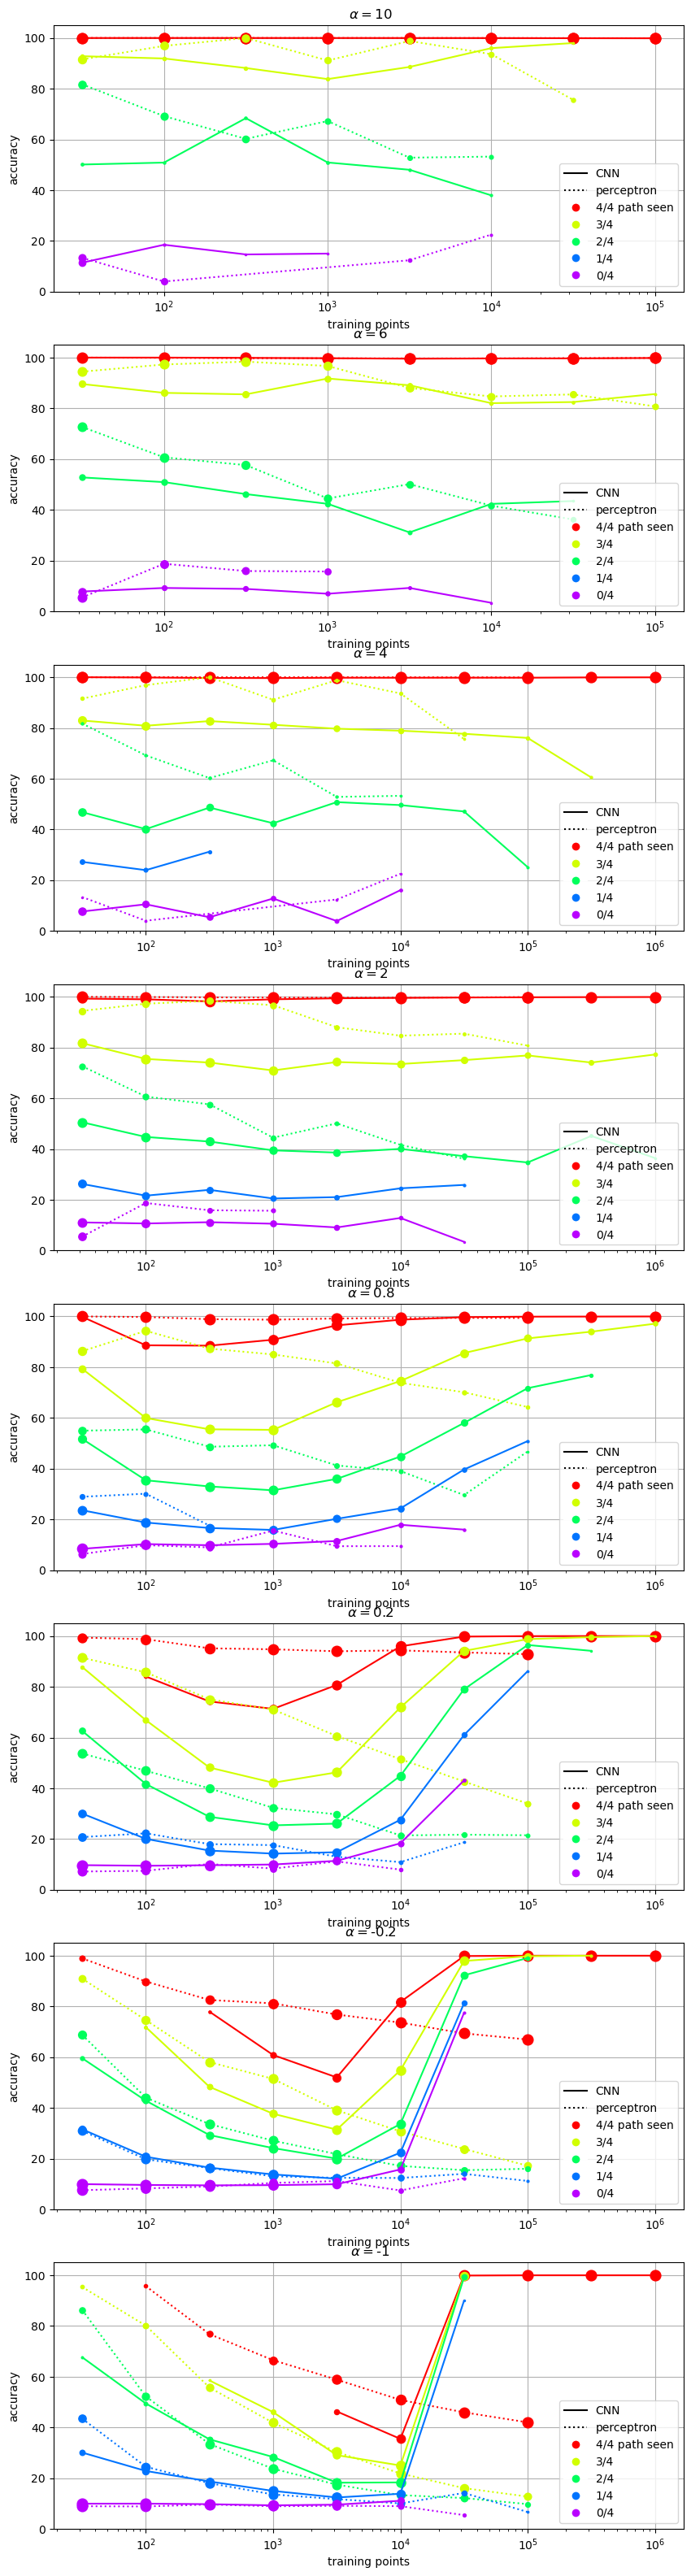

In [8]:
import matplotlib.lines as mlines
fig, axis = plt.subplots(8, 1, figsize=(10, 40)) #원래 8,1, (10,40)
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
# title_list = ["4/4", "3/4", "2/4", "2/4 in same", "1/4", "0/4"]
title_list = ["4/4 path seen", "3/4", "2/4", "1/4", "0/4"]
for j in range(6):
    for i in range(5):
        data = m10_v10_L3_s2_trial10[j, :, i].numpy()
        marker_size = np.log(m10_v10_L3_s2_trial10_test_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(m10_v10_L3_s2_trial10_test_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j+2].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5),label=title_list[i])
        for idx in non_zero_indices:
            axis[j+2].semilogx(ptr_list[idx], data[idx], color=colormap(i/5),  markersize=marker_size[idx], marker='o')
            
        data = perceptron_error[j, :, i].numpy()
        marker_size = np.log(perceptron_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(perceptron_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j+2].semilogx(np.logspace(1.5,5,8)[non_zero_indices], data[non_zero_indices], color=colormap(i/5),linestyle="dotted")
        for idx in non_zero_indices:
            axis[j+2].semilogx(np.logspace(1.5,5,8)[idx], data[idx], color=colormap(i/5),  markersize=marker_size[idx], marker='o',linestyle="dotted")    
    axis[j+2].set_ylim(0, 105)
    axis[j+2].set_title(r" $\alpha=$"+f"{temperature_list[j]}")
    axis[j+2].grid()  
    axis[j+2].set_xlabel("training points")
    axis[j+2].set_ylabel("accuracy")
    axis[j+2].legend(title="path seen")

    
    color_legend = [
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(3/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(4/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(5/5), markersize=8),
    ]

    # color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
    color_labels=title_list
    linestyle_legend = [
        mlines.Line2D([0], [0], linestyle="solid", color='black'),
            # plt.Line2D([0], [0], linestyle="dashdot", color='black'),
        mlines.Line2D([0], [0], linestyle="dotted", color='black'),
        ]
    linestyle_labels = ["CNN", "perceptron"]

    # Merge legends
    all_handles = linestyle_legend + color_legend
    all_labels = linestyle_labels + color_labels

    # Add legends
    axis[j+2].legend(all_handles, all_labels, loc='lower right')
    axis[j+2].grid(True)
    
    # marker_sizes = [5, 4, 3, 2, 1]  # Marker sizes
    # corresponding_values = [100, 50, 30, 20, 10]
    # for size, value in zip(marker_sizes, corresponding_values):
    #     axis[j].scatter([], [], s=size**2, label=f'{value}', alpha=0.5)  # Marker size is squared for better visibility


temperature_list=[10,6]
for j in range(2): #원래 2
    for i in range(5):
        data = m10_v10_L3_s2_trial5_alpha10_6[j, :, i].numpy()
        marker_size = np.log(m10_v10_L3_s2_trial5_alpha10_6_test_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(m10_v10_L3_s2_trial5_alpha10_6_test_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5),label=title_list[i])
        for idx in non_zero_indices:
            axis[j].semilogx(ptr_list[idx], data[idx], color=colormap(i/5),  markersize=marker_size[idx], marker='o')
            
        data = perceptron_error[j, :, i].numpy()
        marker_size = np.log(perceptron_size[j+2, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(perceptron_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j].semilogx(np.logspace(1.5,5,8)[non_zero_indices], data[non_zero_indices], color=colormap(i/5),linestyle="dotted")
        for idx in non_zero_indices:
            axis[j].semilogx(np.logspace(1.5,5,8)[idx], data[idx], color=colormap(i/5),  markersize=marker_size[idx], marker='o',linestyle="dotted")    
    axis[j].set_ylim(0, 105)
    axis[j].set_title(r" $\alpha=$"+f"{temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    axis[j].legend(title="path seen")
    color_legend = [
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(3/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(4/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(5/5), markersize=8),
    ]

    # color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
    color_labels=title_list
    linestyle_legend = [
        mlines.Line2D([0], [0], linestyle="solid", color='black'),
            # plt.Line2D([0], [0], linestyle="dashdot", color='black'),
        mlines.Line2D([0], [0], linestyle="dotted", color='black'),
        ]
    linestyle_labels = ["CNN" ,"perceptron"]

    # Merge legends
    all_handles = linestyle_legend + color_legend
    all_labels = linestyle_labels + color_labels

    # Add legends
    axis[j].legend(all_handles, all_labels, loc='lower right')
    axis[j].grid(True)
    
    # marker_sizes = [5, 4, 3, 2, 1]  # Marker sizes
    # corresponding_values = [100, 50, 30, 20, 10]
    # for size, value in zip(marker_sizes, corresponding_values):
    #     axis[j].scatter([], [], s=size**2, label=f'{value}', alpha=0.5)  # Marker size is squared for better visibility


    